In [1]:
import requests
import os

from tqdm import tqdm
import time
import json
from PIL import Image

from fastai.data.external import download_url
from fastai.vision import *
from fastai.vision.core import PILImage, Image

from pathlib import Path
%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [2]:
api_key = os.environ.get("RAPID_API_KEY")
woodwind_instruments = [
    "clarinet",
    "french horn",
    "flute",
    "oboe",
    "bassoon"
]
string_instruments = [
    "violin",
    "cello",
    "double bass",
    "guitar",
    "mandolin",
]
famous_landmarks= [
    "eiffel tower",
    "tower bridge",
    "westminster",
    "trinity college",
    "louvre",
    "notre dame"
]

In [6]:
def fetch_image_urls(query_string, page_number=1):
    base_url = "https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/Search/ImageSearchAPI"

    querystring = {"autoCorrect":"true","pageNumber":f"{page_number}","pageSize":"50","q":query_string,"safeSearch":"false"}

    headers = {
        'x-rapidapi-host': "contextualwebsearch-websearch-v1.p.rapidapi.com",
        'x-rapidapi-key': os.environ["RAPID_API_KEY"] 
        }

    response = requests.request("GET", base_url, headers=headers, params=querystring)
    response.raise_for_status()
    
    results = response.json()
    total_pages = results.get('totalCount')
    total_calls = total_pages // 50
    
    entries = [x.get("url") for x in results.get('value')]

    return entries

In [10]:

# outputs = {}    
for page in range(2, 5):
    for landmark in tqdm(famous_landmarks):
        if not outputs.get('landmark'):
            outputs[landmark] = []
        try:
            outputs[landmark].append(fetch_image_urls(landmark, page))
        except Exception as e: 
            print(e)

 17%|█▋        | 1/6 [00:02<00:10,  2.07s/it]

500 Server Error: Internal Server Error for url: https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/Search/ImageSearchAPI?autoCorrect=true&pageNumber=2&pageSize=50&q=eiffel+tower&safeSearch=false


 50%|█████     | 3/6 [00:06<00:06,  2.20s/it]

500 Server Error: Internal Server Error for url: https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/Search/ImageSearchAPI?autoCorrect=true&pageNumber=2&pageSize=50&q=westminster&safeSearch=false


 17%|█▋        | 1/6 [00:02<00:10,  2.05s/it]

500 Server Error: Internal Server Error for url: https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/Search/ImageSearchAPI?autoCorrect=true&pageNumber=3&pageSize=50&q=eiffel+tower&safeSearch=false


 17%|█▋        | 1/6 [00:02<00:10,  2.10s/it]

500 Server Error: Internal Server Error for url: https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/Search/ImageSearchAPI?autoCorrect=true&pageNumber=4&pageSize=50&q=eiffel+tower&safeSearch=false


 83%|████████▎ | 5/6 [00:10<00:02,  2.09s/it]

500 Server Error: Internal Server Error for url: https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/Search/ImageSearchAPI?autoCorrect=true&pageNumber=4&pageSize=50&q=louvre&safeSearch=false


100%|██████████| 6/6 [00:13<00:00,  2.31s/it]


In [23]:

# outputs = {}    
# for instrument in tqdm(string_instruments + woodwind_instruments):
#     outputs[instrument] = []
#     outputs[instrument].append(fetch_image_urls(instrument, 1))
    

100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


In [26]:
# for instrument in tqdm(string_instruments + woodwind_instruments):
#     outputs[instrument].append(fetch_image_urls(instrument, 2))

100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


In [11]:
# with open("images_urls", 'r') as f:
#     outputs = json.load(f)
# for instrument in tqdm(string_instruments + woodwind_instruments):
#     try:
#         outputs[instrument].append(fetch_image_urls(instrument, 5))
#     except Exception as e:
#         print(e)

In [12]:

# with open("landmark_images_urls.json", 'w') as f:
#     json.dump(outputs, f)

In [13]:

# with open("landmark_images_urls.json", 'r') as f:
#     image_urls_obj = json.load(f)

In [14]:
# image_urls_obj_corrected = {}
# def flatten_list(list_of_list):
#     flat_list = []
#     for sublist in list_of_list:
#         for item in sublist:
#             flat_list.append(item)
#     return flat_list

# for k, v in image_urls_obj.items():
#     image_urls_obj_corrected[k] = flatten_list(v)

In [15]:
# with open("landmark_images_urls_json.json", "w") as f:
#     json.dump(image_urls_obj_corrected, f)

In [16]:
with open("landmark_images_urls_json.json", 'r') as f:
    image_urls_obj_corrected = json.load(f)

In [19]:
test_path = Path('/media/wwymak/Storage/fastbook/custom_data/landmarks/louvre.jpg')
download_url(image_urls_obj_corrected['louvre'][10], test_path)
im = Image.open(test_path)
im.to_thumb(256, 256)

IndexError: list index out of range

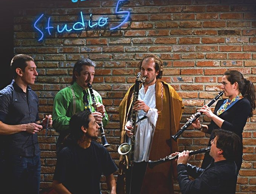

In [13]:
test_path = Path('/media/wwymak/Storage/fastbook/custom_data/instruments/clarinet20.jpg')
download_url(image_urls_obj_corrected['clarinet'][20], test_path)
im = Image.open(test_path)
im.to_thumb(256, 256)

In [11]:
image_urls_obj_corrected.keys()

dict_keys(['violin', 'cello', 'double bass', 'guitar', 'mandolin', 'clarinet', 'french horn', 'flute', 'oboe', 'bassoon'])